**Fruit Image Classification used Logistric regression**

**Chean Botum**

# Import Libraries

Imports: Start by importing the necessary libraries for working with image data. You'll need libraries like torchvision for handling image datasets, PIL for image manipulation, and matplotlib for visualization

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

Import drive to collab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Find number of all classes

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 13897 files belonging to 81 classes.


**Hyperparameters**: Define hyperparameters that suit new task. adjust parameters such as batch_size, learning_rate, input_size, and num_classes based on specific dataset.

In [ ]:
# Hyperparameters
batch_size = 64
learning_rate = 0.001

# Other constants
input_size = 3 * 64 * 64  # Assuming 64x64 color images (3 channels: RGB)
num_classes = 81 # Number of fruit classes


# Load Dataset

**Load Dataset**: Prepare your fruit image dataset. Use the ImageFolder dataset from torchvision to load images from folders organized by class labels.

In [ ]:
# Define data transformation (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to a consistent size
    transforms.ToTensor(),         # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet statistics
])

# Load dataset from a folder structure
dataset = ImageFolder(root='/content/drive/MyDrive/Test', transform=transform)

# Split the dataset into training and validation sets
val_percent = 0.15
val_size = int(len(dataset) * val_percent)
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


**Data Loaders**: Create data loaders for training, validation, and testing using the datasets you defined above.

In [ ]:

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size * 2)
test_loader = DataLoader(dataset, batch_size=batch_size * 2)


**Model Definition**: Define a logistic regression model tailored to your fruit image recognition task. You'll need to adjust the model architecture to match the input size and number of classes.

In [ ]:
class FruitClassifier(nn.Module):
    def __init__(self):
        super(FruitClassifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        out = self.fc(x)
        return out

model = FruitClassifier()


# Training

**Training Loop**: Modify the training loop to train the model on your fruit dataset. You'll also need to adapt the loss function and accuracy calculation to your specific task.

In [12]:
def train(model, train_loader, val_loader, num_epochs, learning_rate):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


        model.eval()
        correct = 0
        total = 0
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Accuracy: {accuracy:.2f}%')

# Train the model
num_epochs = 10
train(model, train_loader, val_loader, num_epochs, learning_rate)


Epoch [1/10], Loss: 0.0961, Validation Accuracy: 98.32%
Epoch [2/10], Loss: 0.1941, Validation Accuracy: 97.84%
Epoch [3/10], Loss: 0.0005, Validation Accuracy: 99.57%
Epoch [4/10], Loss: 0.0867, Validation Accuracy: 98.75%
Epoch [5/10], Loss: 0.1208, Validation Accuracy: 99.04%
Epoch [6/10], Loss: 0.0188, Validation Accuracy: 98.99%
Epoch [7/10], Loss: 0.0019, Validation Accuracy: 99.18%
Epoch [8/10], Loss: 0.0067, Validation Accuracy: 99.38%
Epoch [9/10], Loss: 0.0007, Validation Accuracy: 99.52%
Epoch [10/10], Loss: 0.0414, Validation Accuracy: 99.28%


# Testing and prediction

**Testing and Prediction**: After training the model, you can evaluate its performance on the test dataset and make predictions.

In [13]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

# Test the model
test(model, test_loader)

# Make predictions for a single image
def predict_single_image(image):
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        return predicted.item()


Test Accuracy: 99.41%


use the matplotlib library in Python. Here's an updated code snippet that not only predicts the class of the single fruit image but also displays the image along with the prediction:

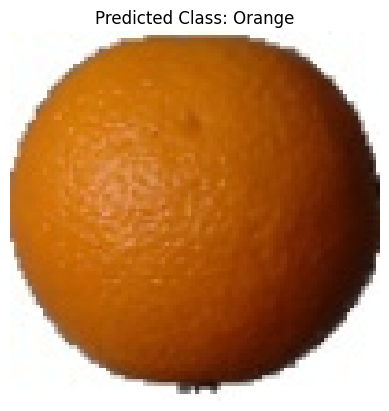

In [157]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models

# Define the transformation for the input image
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to match the model's input size
    transforms.ToTensor(),         # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the single image
image_path = '/content/drive/MyDrive/Test/Orange/30_100.jpg'
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension


# Load a pre-trained model (for example, ResNet-18)
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer to match the number of classes in your dataset
num_classes = 81
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)


# Make a prediction
def predict_single_image(image, model):
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        return predicted.item()

# Assuming 'model' is your trained fruit image classifier
predicted_class = predict_single_image(image_tensor, model)

# Map the predicted class index to the class name
class_names = ['Apple Braeburn','Apple Golden 1','Apple Golden 2','Apple Golden 3','Apple Granny Smith','Apple Red 1','Apple Red 2','Apple Red 3','Apple Red Delicious','Apple Red Yellow', 'Apricot','Avacado','Avacado ripe','Banana','Banana Red', 'Cactus fruit','Cantaloupe 1','Cantaloupe 2','Carambula','Cherry 1','Cherry 2','Cherry Rainier','Cherry Wax Black','Cherry Wax Red','Cherry Wax Yellow','Clementine','Cacos','Dates','Granadila','Grap Pink','Grap White','Grape White 2','Grapfruit Pink','Grapefruit White','Guava','Huckleberry','Kiwi','Kumquats','Lemon','Lemon Meyer','Limes','Lychee','Mandrarine','Mango','Maracuja','Melon Piel de Sapo','Mulberry','Nectarine','Orange','Papaya','Passion Fruit','Peach','Peach Flat','Pear','Pear Abate','Pear Monster','Pear Williams','Pepino','Physalis','Physalis with Husk','Pineapple','Pineapple Mini','Pitahaya Red','Plum','Pomegranate','Quince','Rambutan','Raspberry','Salak','Strawberry','Strawberry Wedge','Tamarillo','Tangelo','Tomato 1','Tomato 2','Tomato 3','Tomato 4','Tomato Cherry Red','Tomato Maroon','Walnut']
predicted_class_name = class_names[predicted_class]

# Display the image along with the prediction
plt.imshow(np.asarray(image))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.axis('off')
plt.show()

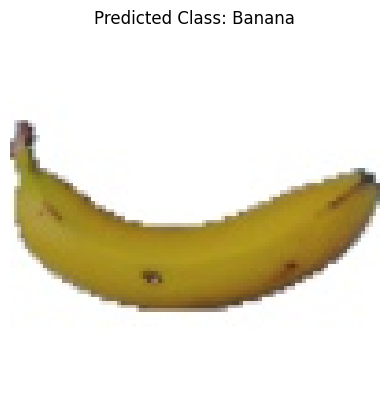

In [80]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models

# Define the transformation for the input image
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to match the model's input size
    transforms.ToTensor(),         # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the single image
image_path = '/content/drive/MyDrive/Test/Banana/100_100.jpg'
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension


# Load a pre-trained model (for example, ResNet-18)
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer to match the number of classes in your dataset
num_classes = 81
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)


# Make a prediction
def predict_single_image(image, model):
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        return predicted.item()

# Assuming 'model' is your trained fruit image classifier
predicted_class = predict_single_image(image_tensor, model)

# Map the predicted class index to the class name
class_names = ['Apple Braeburn','Apple Golden 1','Apple Golden 2','Apple Golden 3','Apple Granny Smith','Apple Red 1','Apple Red 2','Apple Red 3','Apple Red Delicious','Apple Red Yellow', 'Apricot','Avacado','Avacado ripe','Banana','Banana Red', 'Cactus fruit','Cantaloupe 1','Cantaloupe 2','Carambula','Cherry 1','Cherry 2','Cherry Rainier','Cherry Wax Black','Cherry Wax Red','Cherry Wax Yellow','Clementine','Cacos','Dates','Granadila','Grap Pink','Grap White','Grape White 2','Grapfruit Pink','Grapefruit White','Guava','Huckleberry','Kiwi','Kumquats','Lemon','Lemon Meyer','Limes','Lychee','Mandrarine','Mango','Maracuja','Melon Piel de Sapo','Mulberry','Nectarine','Orange','Papaya','Passion Fruit','Peach','Peach Flat','Pear','Pear Abate','Pear Monster','Pear Williams','Pepino','Physalis','Physalis with Husk','Pineapple','Pineapple Mini','Pitahaya Red','Plum','Pomegranate','Quince','Rambutan','Raspberry','Salak','Strawberry','Strawberry Wedge','Tamarillo','Tangelo','Tomato 1','Tomato 2','Tomato 3','Tomato 4','Tomato Cherry Red','Tomato Maroon','Walnut']
predicted_class_name = class_names[predicted_class]

# Display the image along with the prediction
plt.imshow(np.asarray(image))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.axis('off')
plt.show()

# Plot Graph

Create a graph showing the accuracy of model over time, we'll typically need to log the training and validation accuracy at each epoch during the training process. We can use popular deep learning frameworks like PyTorch or TensorFlow to achieve this. Here, I'll provide a generic example of how to create an accuracy graph using Matplotlib and a list of accuracy values obtained from our training process.

Assuming we have collected the training and validation accuracy values in two lists, train_accuracy and val_accuracy, respectively, we can create a simple accuracy graph as follows:

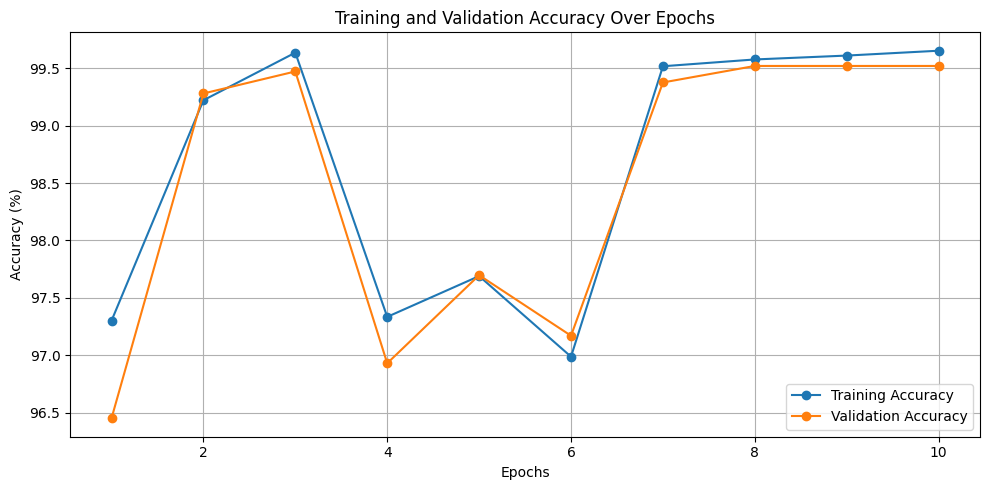

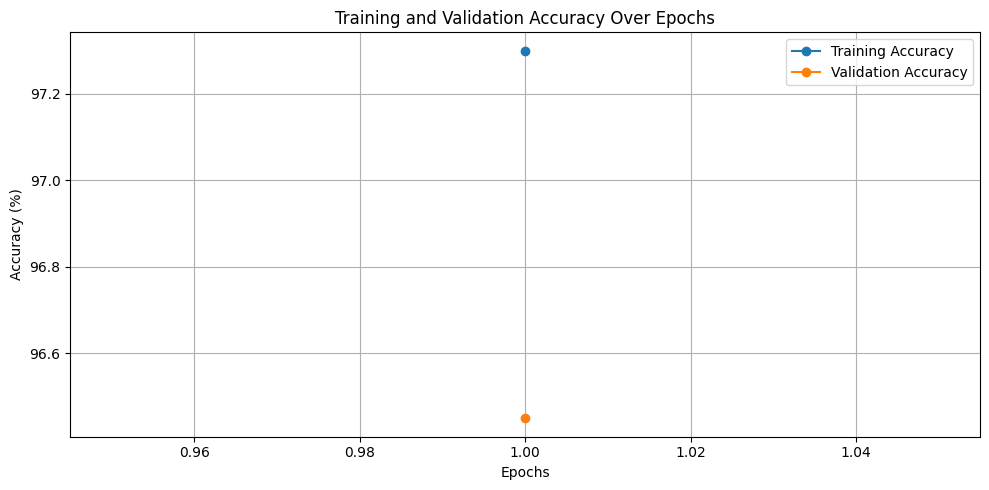

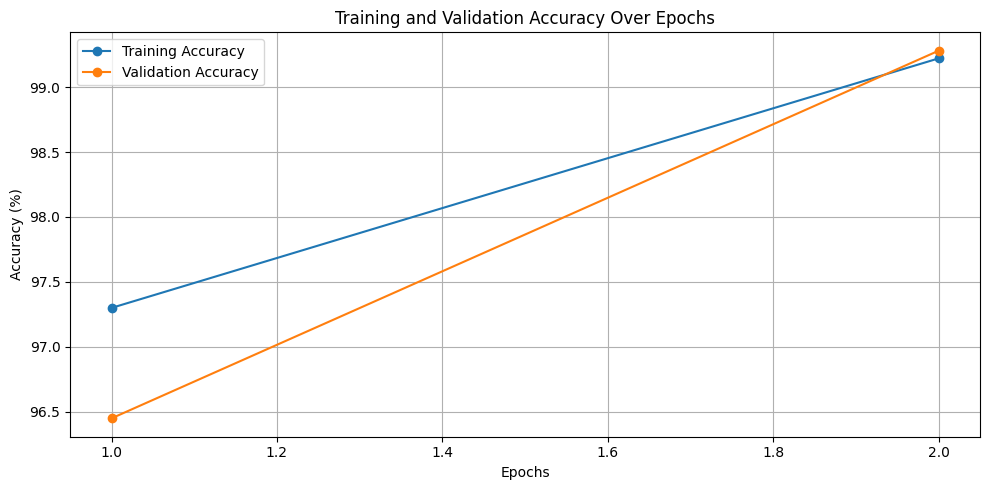

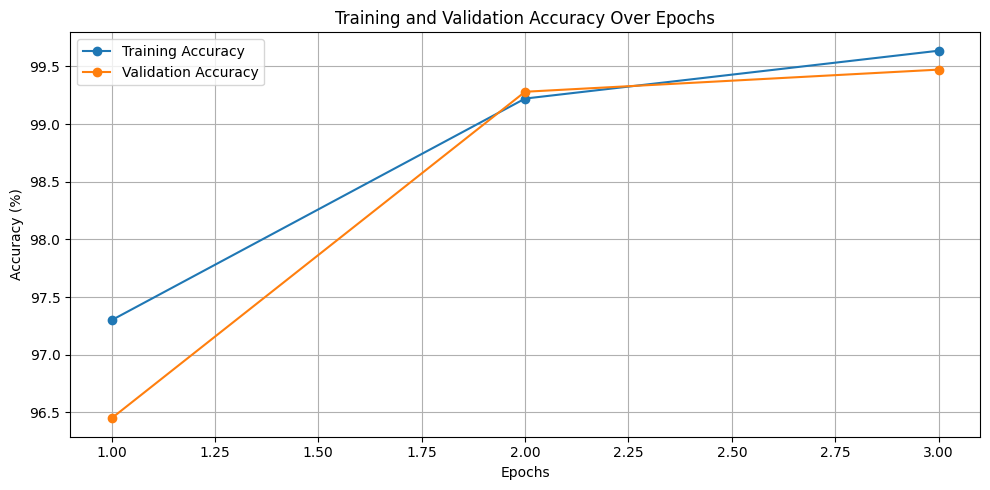

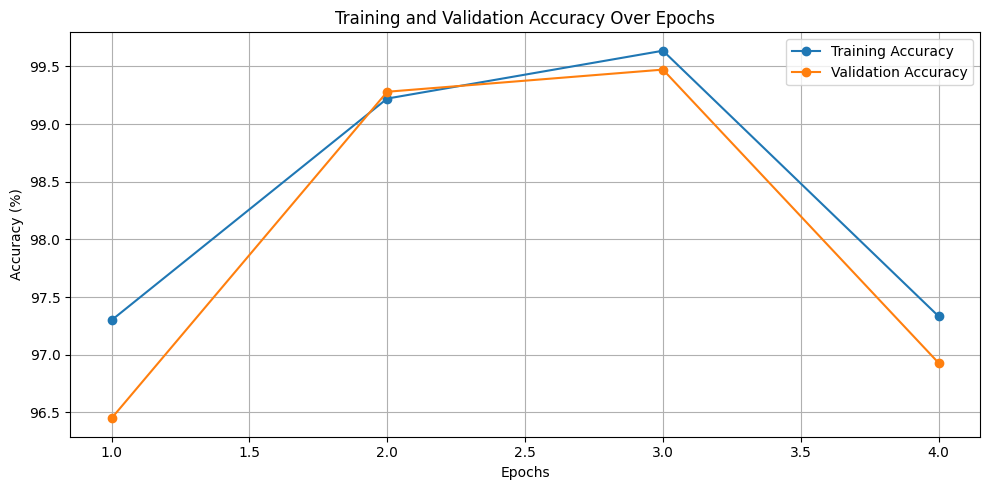

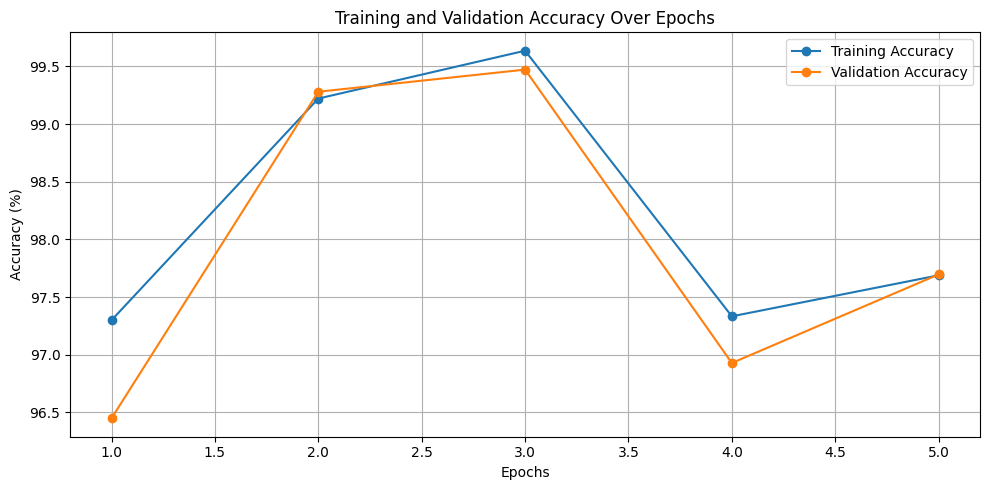

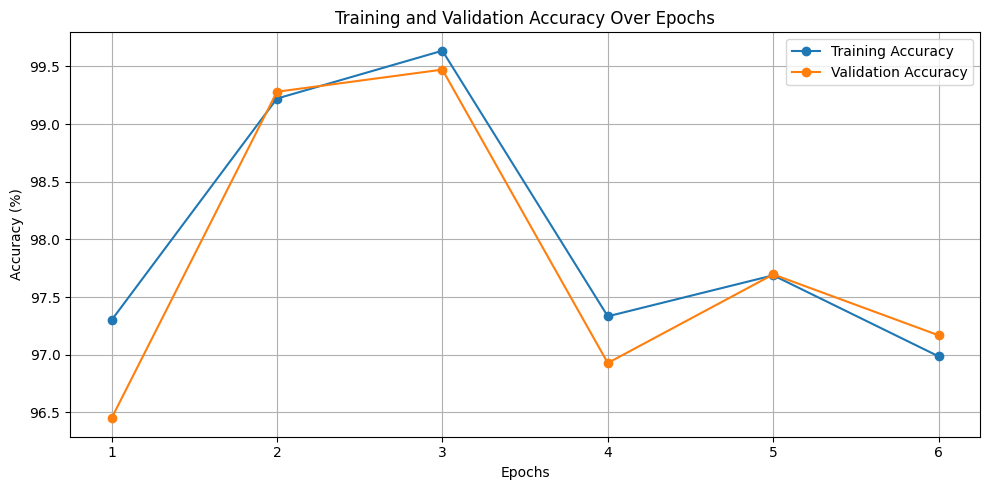

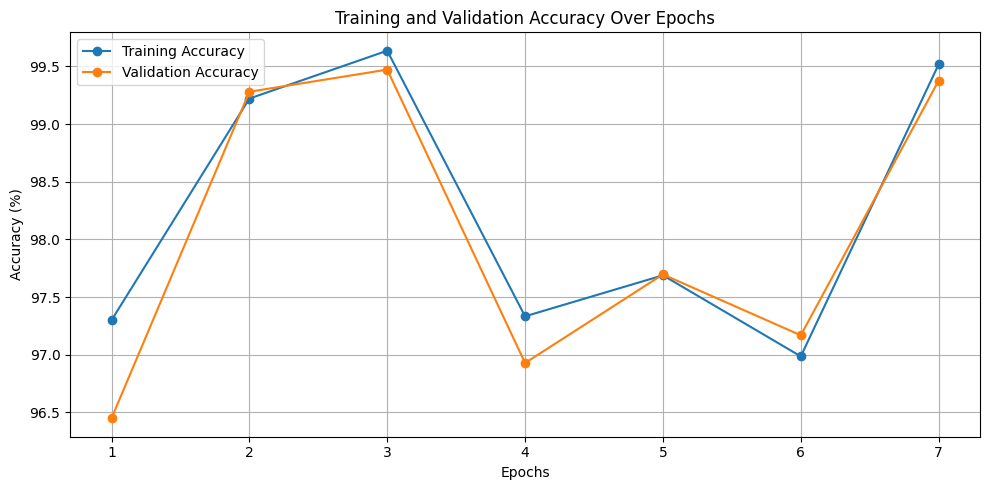

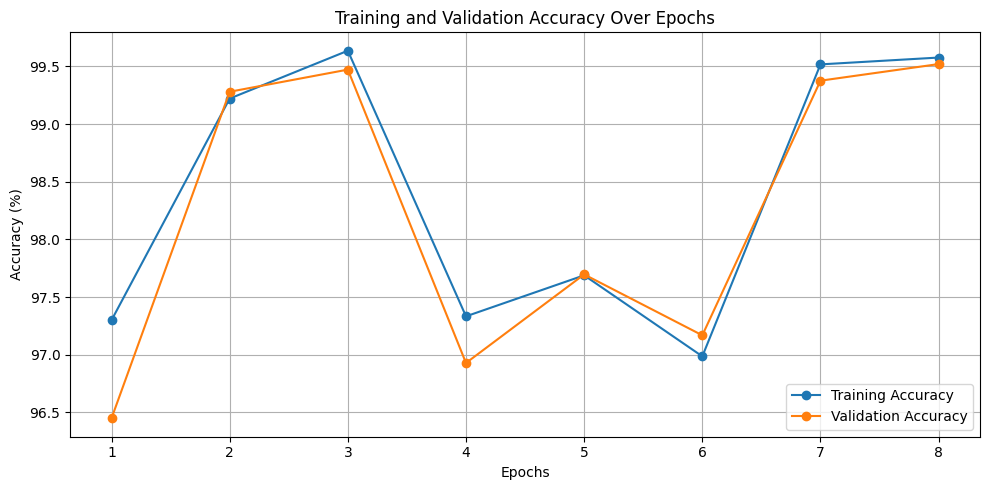

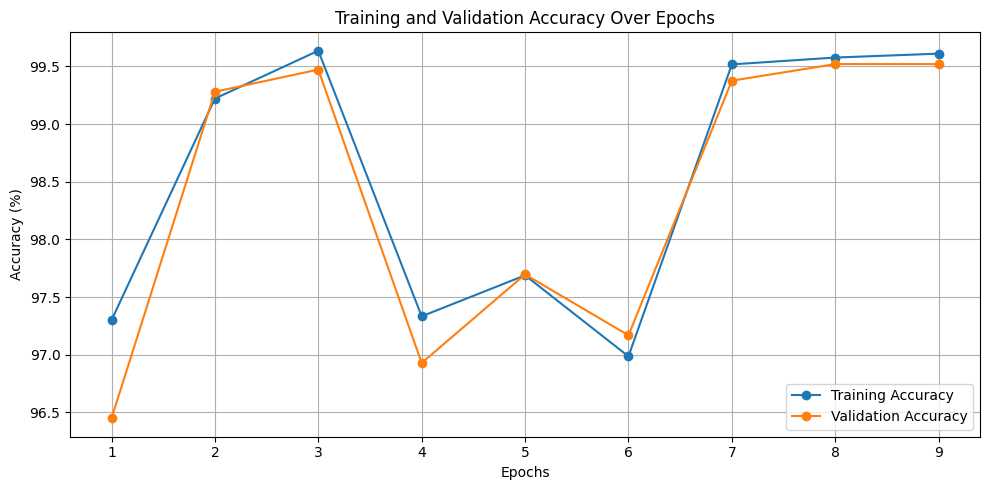

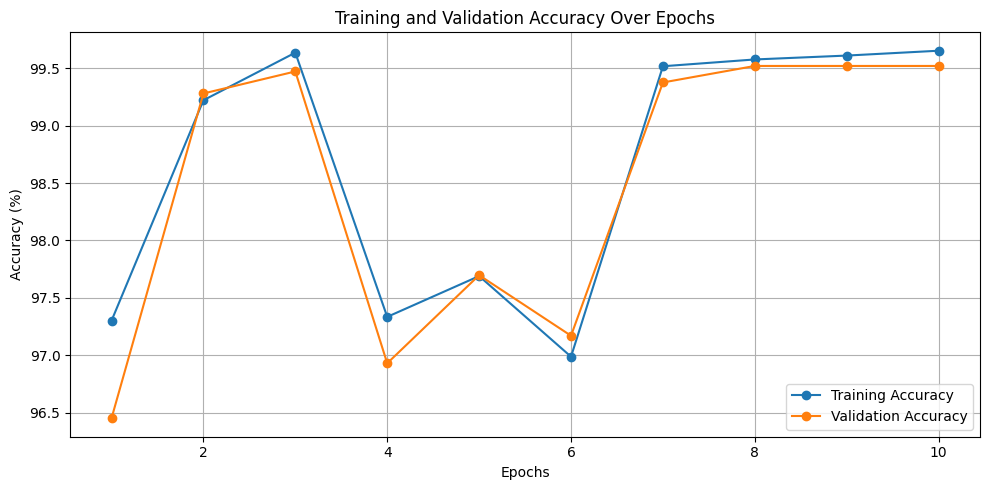

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Function to train the model and update live plot
def train_and_plot(model, train_loader, val_loader, num_epochs, learning_rate):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    train_accuracy_history = []
    val_accuracy_history = []
    x_values = []

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        train_correct = 0
        train_total = 0
        val_correct = 0
        val_total = 0

        for images, labels in train_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

        train_accuracy = 100 * train_correct / train_total
        val_accuracy = 100 * val_correct / val_total

        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)
        x_values.append(epoch + 1)

        # Update the live plot
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(x_values, train_accuracy_history, label='Training Accuracy', marker='o')
        plt.plot(x_values, val_accuracy_history, label='Validation Accuracy', marker='o')
        plt.title('Training and Validation Accuracy Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        display(plt.gcf())

    return train_accuracy_history, val_accuracy_history

# Train the model and update live plot
num_epochs = 10
train_accuracy_history, val_accuracy_history = train_and_plot(model, train_loader, val_loader, num_epochs, learning_rate)
